In [32]:
#importing necessary libraries
import pandas as pd
import numpy as np
import sklearn


In [33]:
#reading data into a data frame to analyze
df=pd.read_csv('https://raw.githubusercontent.com/ArinB/MSBA-CA-03-Decision-Trees/refs/heads/master/census_data.csv')

In [34]:
#taking a first look at the data
df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


# Perform Data Quality Analysis

In [35]:
#initial data quality check to see if any columns have null values and gathering insights on data type
#observation: there are no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [37]:
#importing AutoViz to help with EDA
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4
Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [38]:
#Autoviz provided me with insights on the data in this df
AV.AutoViz(df)

Shape of your Data Set loaded: (48842, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  8
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    11 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 4001

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
hours_per_week_bin,object,0.000000,0,,,No issue
occupation_bin,object,0.000000,0,,,No issue
msr_bin,object,0.000000,0,,,No issue
capital_gl_bin,object,0.000000,0,,,No issue
race_sex_bin,object,0.000000,0,,,No issue
education_num_bin,object,0.000000,0,,,No issue
education_bin,object,0.000000,0,,,No issue
workclass_bin,object,0.000000,0,,,No issue
age_bin,object,0.000000,0,,,No issue
flag,object,0.000000,0,,,No issue


All Plots done
Time to run AutoViz = 5 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


# Display descriptive statistics for each column

In [39]:
#gathering descriptive statistics on the data. Since all but one column is categorical, count, unique, frequency are the most important metrics to look at
df.describe(include="all")

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842.000000
unique,5,5,3,3,3,5,5,2,5,2,NaN
top,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,NaN
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963,32561,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.239282
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.426649
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [41]:
#generating more insightul descriptive statistics that show meaningful metrics for categorical values

def generate_descriptive_stats(df):
    summary_stats = pd.DataFrame({
        "Column": df.columns,
        "Unique Values": df.nunique().values,
        "Most Frequent Value (Mode)": [df[col].mode()[0] for col in df.columns],
        "Mode Frequency": [df[col].value_counts().iloc[0] for col in df.columns],
        "Mode %": [df[col].value_counts().iloc[0] / len(df) * 100 for col in df.columns],
        "Data Type": df.dtypes.values
    })
    return summary_stats

generate_descriptive_stats(df)



,Column,Unique Values,Most Frequent Value (Mode),Mode Frequency,Mode %,Data Type
0,hours_per_week_bin,5,b. 31-40,26639,54.541174,object
1,occupation_bin,5,c. Mid - Mid,13971,28.604480,object
2,msr_bin,3,c. High,22047,45.139429,object
3,capital_gl_bin,3,a. = 0,42525,87.066459,object
4,race_sex_bin,3,c. High,29737,60.884075,object
5,education_num_bin,5,b. 9-12,30324,62.085910,object
6,education_bin,5,b. Mid,30324,62.085910,object
7,workclass_bin,2,b. income,46012,94.205806,object
8,age_bin,5,e. 40-55,13963,28.588100,object
9,flag,2,train,32561,66.665984,object


# Generating Data Quality Report

In [42]:
#for numerical features
numerical_report = df.describe().transpose()
numerical_report["Missing Values"] = df.isnull().sum()
numerical_report["Missing %"] = (df.isnull().sum() / len(df)) * 100
numerical_report["Cardinality"] = df.nunique()

numerical_report = numerical_report.reset_index().rename(columns={"index": "Feature"})
numerical_report

,Feature,count,mean,std,min,25%,50%,75%,max,Missing Values,Missing %,Cardinality
0,y,48842.0,0.239282,0.426649,0.0,0.0,0.0,0.0,1.0,0,0.0,2


In [43]:
#for categorical features
def generate_categorical_report(df):
    categorical_columns = df.select_dtypes(include=["object"]).columns
    summary_stats = pd.DataFrame({
        "Unique Values": df[categorical_columns].nunique().values,
        "Most Frequent Value (Mode)": [df[col].mode()[0] for col in categorical_columns],
        "Mode Frequency": [df[col].value_counts().iloc[0] for col in categorical_columns],
        "Mode %": [df[col].value_counts().iloc[0] / len(df) * 100 for col in categorical_columns],
        "Missing Values": df[categorical_columns].isnull().sum().values,
        "Missing %": (df[categorical_columns].isnull().sum() / len(df)) * 100
    })
    return summary_stats

categorical_report = generate_categorical_report(df)
categorical_report

,Unique Values,Most Frequent Value (Mode),Mode Frequency,Mode %,Missing Values,Missing %
hours_per_week_bin,5,b. 31-40,26639,54.541174,0,0.0
occupation_bin,5,c. Mid - Mid,13971,28.604480,0,0.0
msr_bin,3,c. High,22047,45.139429,0,0.0
capital_gl_bin,3,a. = 0,42525,87.066459,0,0.0
race_sex_bin,3,c. High,29737,60.884075,0,0.0
education_num_bin,5,b. 9-12,30324,62.085910,0,0.0
education_bin,5,b. Mid,30324,62.085910,0,0.0
workclass_bin,2,b. income,46012,94.205806,0,0.0
age_bin,5,e. 40-55,13963,28.588100,0,0.0
flag,2,train,32561,66.665984,0,0.0


# Performing necessary data transformations

In [44]:
#importing to help with encoding categorical variables
from sklearn.preprocessing import LabelEncoder


# creating a copy to avoid direct modification
df_encoded = df.copy()

# initializing the label encoder
encoder = LabelEncoder()

#applying encoding to all columns except flag and y
categorical_columns = df_encoded.select_dtypes(include=["object"]).columns.drop(["flag"])

for col in categorical_columns:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])


In [45]:
# splitting data into test and train based on flag column
df_train = df_encoded[df_encoded["flag"] == "train"].drop(columns=["flag"])
df_test = df_encoded[df_encoded["flag"] == "test"].drop(columns=["flag"])

# look at first rows
print(df_train.head())
print(df_test.head())

   hours_per_week_bin  occupation_bin  msr_bin  capital_gl_bin  race_sex_bin  \
0           1                 1           1            2              2        
1           0                 4           2            0              2        
2           1                 0           1            0              2        
3           1                 0           2            0              1        
4           1                 4           2            0              0        

   education_num_bin  education_bin  workclass_bin  age_bin  y  
0          2                2              1           3     0  
1          2                2              1           4     0  
2          1                1              1           3     0  
3          0                0              1           4     0  
4          2                2              1           1     0  
       hours_per_week_bin  occupation_bin  msr_bin  capital_gl_bin  \
32561           1                 1           0            

In [46]:
# Define Features (X) and Target (y) for Training and Test Sets
X_train = df_train.drop(columns=["y"])  # Training Features
y_train = df_train["y"]                 # Training Target

X_test = df_test.drop(columns=["y"])    # Test Features
y_test = df_test["y"]                   # Test Target


In [47]:
print(X_train.head())
print(y_train.head())

   hours_per_week_bin  occupation_bin  msr_bin  capital_gl_bin  race_sex_bin  \
0           1                 1           1            2              2        
1           0                 4           2            0              2        
2           1                 0           1            0              2        
3           1                 0           2            0              1        
4           1                 4           2            0              0        

   education_num_bin  education_bin  workclass_bin  age_bin  
0          2                2              1           3     
1          2                2              1           4     
2          1                1              1           3     
3          0                0              1           4     
4          2                2              1           1     
0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64


# Build decision tree classifier models

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [50]:


# Initialize the Decision Tree Model
dtree = DecisionTreeClassifier(
    max_depth=10,           # Limits the depth of the tree
    random_state=101,       # Ensures reproducibility
    max_features=None,      # Uses all features
    min_samples_leaf=5     # Minimum samples required at a leaf node
)

# Train the Model
dtree.fit(X_train, y_train)

# Make Predictions
y_pred = dtree.predict(X_test)


# Evaluate decision tree performance

In [51]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Detailed classification report (Precision, Recall, F1-score)
print(classification_report(y_test, y_pred))


Model Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.56      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.84      0.84      0.84     16281



In [52]:
#importing to help gather insights on model performance
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# computing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# computing evaluation matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# extracting relevant metrics from matrix
tn, fp, fn, tp = conf_matrix.ravel()

# creating a df to display TP, TN, FP, FN
conf_matrix_df = pd.DataFrame({
    "Metric": ["True Positives (TP)", "True Negatives (TN)", "False Positives (FP)", "False Negatives (FN)"],
    "Value": [tp, tn, fp, fn]
})

# Display Confusion Matrix and Evaluation Metrics
print("Confusion Matrix:")
print(conf_matrix_df)

print("Model Evaluation Metrics:")
print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")


Confusion Matrix:
          Metric         Value
0   True Positives (TP)   2166
1   True Negatives (TN)  11564
2  False Positives (FP)    871
3  False Negatives (FN)   1680
Model Evaluation Metrics:
Accuracy:  0.84
Precision: 0.71
Recall:    0.56
F1 Score:  0.63


# Tune Decision Tree performance

In [53]:
# defining hyperparameters based on given situation
hyperparameter_sets = [
    {"criterion": "gini", "max_features": None, "min_samples_leaf": 5, "max_depth": 10},
    {"criterion": "gini", "max_features": 0.5, "min_samples_leaf": 10, "max_depth": 15},
    {"criterion": "entropy", "max_features": None, "min_samples_leaf": 5, "max_depth": 10},
    {"criterion": "entropy", "max_features": 0.5, "min_samples_leaf": 10, "max_depth": 15},
]

# storing results
performance_results = []

# iterate through each hyperparameter set
for params in hyperparameter_sets:
    dtree = DecisionTreeClassifier(
        criterion=params["criterion"],
        max_features=params["max_features"],
        min_samples_leaf=params["min_samples_leaf"],
        max_depth=params["max_depth"],
        random_state=101  #ensure reproducibility
    )

    # train the model
    dtree.fit(X_train, y_train)

    # make predictions
    y_pred = dtree.predict(X_test)

    # compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # store results
    performance_results.append({
        "Split Criteria": params["criterion"],
        "Max Features": params["max_features"],
        "Min Samples Leaf": params["min_samples_leaf"],
        "Max Depth": params["max_depth"],
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# convert results into df
performance_df = pd.DataFrame(performance_results)
print(performance_df)


  Split Criteria  Max Features  Min Samples Leaf  Max Depth  Accuracy  \
0        gini          NaN              5            10      0.843314   
1        gini          0.5             10            15      0.842884   
2     entropy          NaN              5            10      0.843314   
3     entropy          0.5             10            15      0.841349   

   Precision   Recall   F1 Score  
0  0.713204   0.563183  0.629377  
1  0.710046   0.566043  0.629919  
2  0.711256   0.566823  0.630878  
3  0.710430   0.554342  0.622754  


In [54]:
import matplotlib.pyplot as plt

# Creating line plots for hyperparameters vs. accuracy

# Min Samples Leaf vs. Accuracy
plt.figure(figsize=(8, 5))
plt.plot(performance_df["Min Samples Leaf"], performance_df["Accuracy"], marker='o', linestyle='-')
plt.xlabel("Min Samples Leaf")
plt.ylabel("Accuracy")
plt.title("Min Samples Leaf vs. Accuracy")
plt.grid(True)
plt.show()

# Max Features vs. Accuracy
plt.figure(figsize=(8, 5))
plt.plot(performance_df["Max Features"].astype(str), performance_df["Accuracy"], marker='o', linestyle='-')
plt.xlabel("Max Features")
plt.ylabel("Accuracy")
plt.title("Max Features vs. Accuracy")
plt.grid(True)
plt.show()

# Max Depth vs. Accuracy
plt.figure(figsize=(8, 5))
plt.plot(performance_df["Max Depth"], performance_df["Accuracy"], marker='o', linestyle='-')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Max Depth vs. Accuracy")
plt.grid(True)
plt.show()


In [55]:
from sklearn.tree import export_graphviz
import graphviz

# Train the best decision tree model using the best accuracy result
best_tree = DecisionTreeClassifier(
    criterion="gini",
    max_features=None,
    min_samples_leaf=5,
    max_depth=10,
    random_state=101
)
best_tree.fit(X_train, y_train)

# Visualizing the decision tree using GraphViz
dot_data = export_graphviz(
    best_tree,
    out_file=None,
    feature_names=X_train.columns,
    class_names=["0", "1"],  # Modify class labels if needed
    filled=True,
    rounded=True,
    special_characters=True
)

# Render and display the tree
graph = graphviz.Source(dot_data)
graph.view()  # Opens the visualization


'Source.gv.pdf'

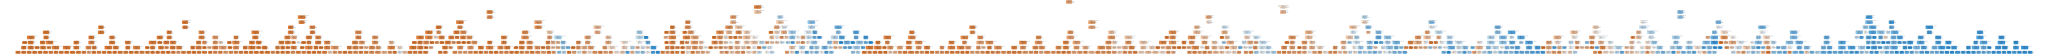

In [56]:
#display the decision tree
from IPython.display import display
graph = graphviz.Source(dot_data)
display(graph)

# Conclusion

**Why does it makes sense to discretize columns for this problem?**

Discretizing columns is important for this problem because the dataset consists mostly of categorical variables. Since decision trees work best with numerical data, categorical variables must be encoded or transformed into a numerical format for effective model training.
Additionally, discretization helps reduce complexity by converting continuous numerical variables into meaningful categorical bins. This makes the model easier to interpret and analyze. Instead of treating each unique numerical value as a separate entity, discretization groups similar values together, allowing for more structured decision-making within the tree.

**What might be the issues (if any) if we DID NOT discretize the columns**
One major problem is inefficient decision tree splitting. Decision trees work by creating splits at feature values, and if numerical features remain continuous, the tree may create too many splits. This leads to overly complex and deep trees that are harder to interpret.
Without discretization, the model might become too sensitive to small variations in numerical data. This could result in overfitting, where the model performs well on training data but poorly on unseen data. Additionally, handling continuous variables increases computational complexity, as the decision tree must evaluate many potential split points instead of a fixed set of categories.

**How long was your total run time to train the best model?**
*   Less than a second

**Did you find the BEST tree?**


*   There is no such thing as best tree. By increasing the outcome of one hyperparameter, another one decreases. Best is a relative word and there are tradeoffs when trying to increase one hyperparameter. There is no way to maximize all hyperparameters without negatively affecting another.

**Write your observations from the visualization of the best tree**


*   The first split occurs on education_num_bin, indicating that education level is the most important factor in predicting the target variable. Nodes with lower Gini index that are closer to 0 indicate purer classifications.

**Will this Tree “overfit”? (Hint: Is this tree “fully grown)**


*  The tree is very large and has many levels to it.The tree is very deep which means it captures a specific pattern in the data so it may be hard to predict.While some leaf nodes have a low Gini index (indicating clear class separation), others still have higher impurity, meaning the tree may have grown deeper than necessary.

# Prediction using your “trained” Decision Tree Model

In [57]:
# Define the new individual's data with the same structure as X_train
new_data = pd.DataFrame([{
    "hours_per_week_bin": 3,
    "occupation_bin": 1,
    "msr_bin": 2,
    "capital_gl_bin": 1,
    "race_sex_bin": 1,
    "education_num_bin": 2,
    "education_bin": 2,
    "workclass_bin": 1,
    "age_bin": 4
}])

# Ensure column order matches X_train
new_data = new_data[X_train.columns]

# Make prediction & get probability scores
predicted_class = best_tree.predict(new_data)[0]
probabilities = best_tree.predict_proba(new_data)[0]

# Print final prediction with confidence
if predicted_class == 0:
    print(f"Predicted Income Category: <=50K with {probabilities[0]*100:.2f}% confidence")
else:
    print(f"Predicted Income Category: >50K with {probabilities[1]*100:.2f}% confidence")



Predicted Income Category: >50K with 100.00% confidence
